## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [8]:
df.isnull().sum()

label     0
review    0
dtype: int64

## Checking Empty Strings

In [9]:
df['review'].str.isspace().sum()

np.int64(27)

In [10]:
df = df[~df['review'].str.isspace()]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

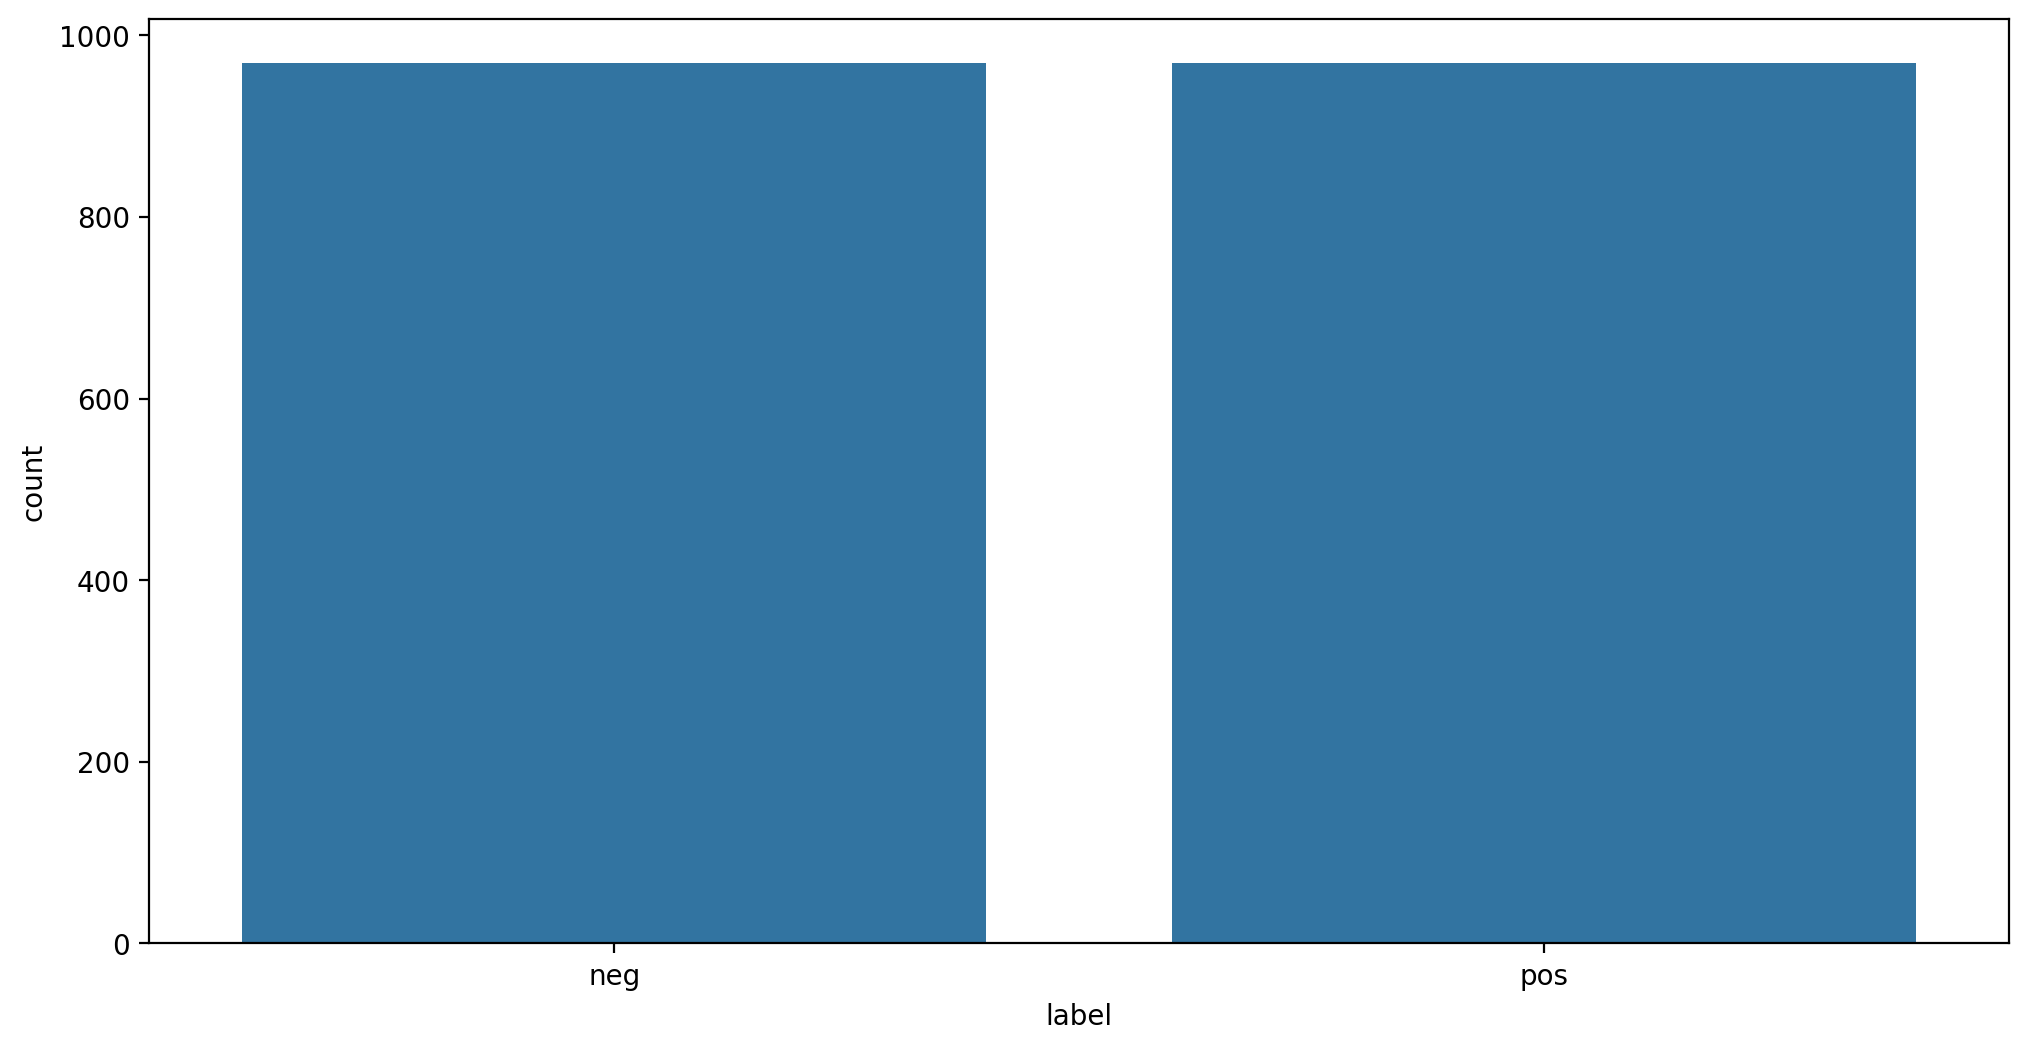

In [12]:
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(data=df, x='label')

## Count Vectorization

To get the top 20 words (that are not english stop words) per label type

In [13]:
count_vectorizer = CountVectorizer(stop_words='english')

In [14]:
matrix = count_vectorizer.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(count_vectorizer.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])  

print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [15]:
matrix = count_vectorizer.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(count_vectorizer.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])  

print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Splitting Data

In [16]:
X = df['review']
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Vectorization

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')

In [19]:
X_train_vectorizer = vectorizer.fit_transform(X_train)

In [20]:
X_test_vectorizer = vectorizer.transform(X_test)

## Building Model

### Naive Bayes

In [21]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorizer, y_train)

MultinomialNB()

### Logistic Regression

In [22]:
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_vectorizer, y_train)

LogisticRegression(max_iter=1000)

### Support Vector

In [23]:
support_vector = SVC()
support_vector.fit(X_train_vectorizer, y_train)

SVC()

### Linear Support Vector

In [24]:
linear_support_vector = LinearSVC()
linear_support_vector.fit(X_train_vectorizer, y_train)

LinearSVC()

## Evaluation

In [25]:
def report(model):
    predictions = model.predict(X_test_vectorizer)
    
    print(classification_report(y_test, predictions))
    
    matrix = confusion_matrix(y_test, predictions, labels=model.classes_)
    confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model.classes_)
    print(confusion_matrix_plot.plot())

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



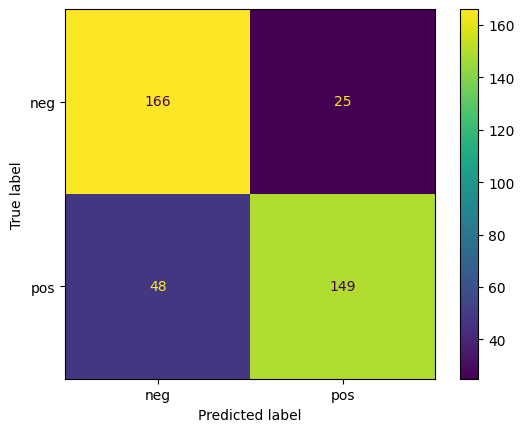

In [26]:
report(naive_bayes)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



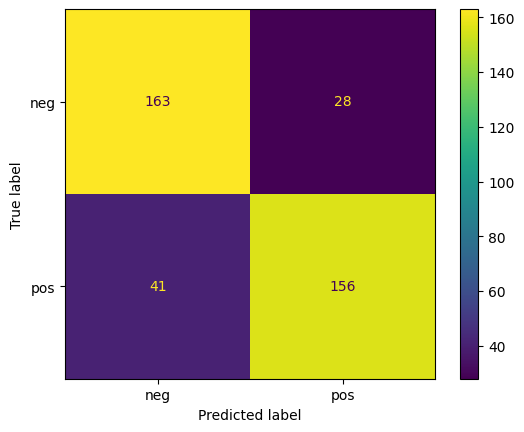

In [27]:
report(logistic_regression)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.83       191
         pos       0.84      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



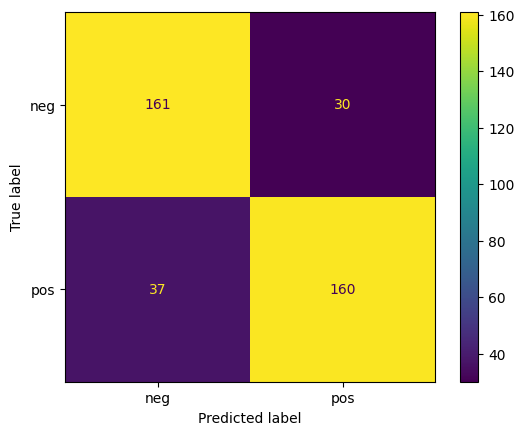

In [28]:
report(support_vector)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



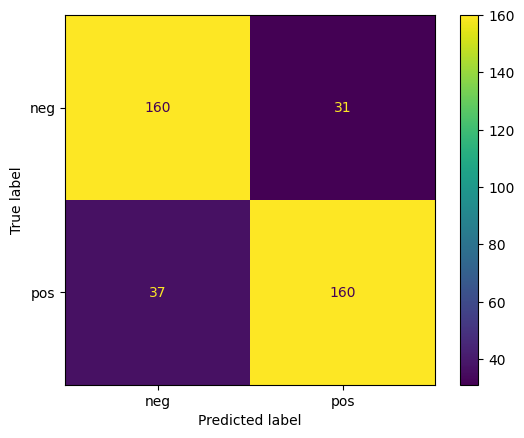

In [29]:
report(linear_support_vector)

## Building Pipeline

In [30]:
model_pipeline = Pipeline([('tfidf', TfidfVectorizer()),('svc', LinearSVC()),])

In [31]:
model_pipeline.fit(X, y)  

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [32]:
model_pipeline.predict(['great movie'])

array(['pos'], dtype=object)

In [33]:
model_pipeline.predict(['normal movie'])

array(['pos'], dtype=object)

In [34]:
model_pipeline.predict(['bad movie'])

array(['neg'], dtype=object)

In [35]:
model_pipeline.predict(['great cast poor storyline'])

array(['neg'], dtype=object)